https://github.com/AI-is-out-there/data2lab

In [48]:
import polars as pl
import pandas as pd
import numpy as np
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score

from fedot.api.main import Fedot

from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

import h2o
from h2o.automl import H2OAutoML

import joblib

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pl.read_csv('mod3_practice_data.csv')

In [3]:
data.shape

(10000, 36)

In [4]:
data.columns

['subject_id',
 'Count_subj',
 'study_id',
 'cart_id',
 'Healthy_Status',
 'eeg_time ',
 'eeg_date ',
 'report_0',
 'report_1',
 'report_2',
 'report_3',
 'report_4',
 'report_5',
 'report_6',
 'report_7',
 'report_8',
 'report_9',
 'report_10',
 'report_11',
 'report_12',
 'report_13',
 'report_14',
 'report_15',
 'report_16',
 'report_17',
 'bandwidth',
 'filtering',
 'rr_interval',
 'p_onset',
 'p_end',
 'qrs_onset',
 'qrs_end',
 't_end',
 'p_axis',
 'qrs_axis',
 't_axis']

In [5]:
cols = ['Count_subj', 'rr_interval', 'p_end', 'qrs_onset', 'qrs_end', 'p_axis', 'qrs_axis', 't_axis', 'Healthy_Status']
data = data[cols]

target_col = 'Healthy_Status'
feature_cols = [col for col in data.columns if col != target_col]

X = data.select(feature_cols).to_numpy()
y = data.select(target_col).to_numpy().ravel()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

In [7]:
z_scores = np.abs(zscore(X_train))
outlier_mask = (z_scores < 3).all(axis=1)
X_train = X_train[outlier_mask]
y_train = y_train[outlier_mask]

In [8]:
# Балансируем классы SMOTE (только для обучающей выборки)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [9]:
fedot_model = Fedot(problem='classification', timeout=5)
fedot_model.fit(features=X_train, target=y_train, )

2025-05-25 16:37:36,874 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-25 16:37:41,204 - ApiComposer - Initial pipeline was fitted in 4.3 sec.
2025-05-25 16:37:41,206 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 21.5 sec.
2025-05-25 16:37:41,206 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-05-25 16:37:41,214 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-05-25 16:37:41,299 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-05-25 16:37:44,332 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-25 16:37:44,407 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-25 16:37:44,490 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-25 16:37:44,531 - Topological features operation requires extra dependencies for time series forecasting, which are not installed. It can infuence the performance. Please install it by 'pip install fedot[extra]'
2025-05-25 16:37:44,592 - Topological features operation requires extra dependencies for time series forecasting, which 

Generations:   0%|          | 1/10000 [01:05<181:55:03, 65.50s/gen]

2025-05-25 16:39:04,180 - MultiprocessingDispatcher - 26 individuals out of 28 in previous population were evaluated successfully.
2025-05-25 16:39:18,702 - MultiprocessingDispatcher - 24 individuals out of 26 in previous population were evaluated successfully.


Generations:   0%|          | 2/10000 [01:37<126:54:09, 45.69s/gen]

2025-05-25 16:39:41,950 - MultiprocessingDispatcher - 41 individuals out of 47 in previous population were evaluated successfully.
2025-05-25 16:39:57,813 - MultiprocessingDispatcher - 10 individuals out of 10 in previous population were evaluated successfully.


Generations:   0%|          | 3/10000 [02:16<118:32:33, 42.69s/gen]

2025-05-25 16:40:13,451 - MultiprocessingDispatcher - 27 individuals out of 30 in previous population were evaluated successfully.
2025-05-25 16:40:35,285 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-05-25 16:40:35,297 - MultiprocessingDispatcher - 20 individuals out of 20 in previous population were evaluated successfully.


Generations:   0%|          | 4/10000 [02:53<112:48:45, 40.63s/gen]

2025-05-25 16:40:35,318 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 4/10000 [02:53<120:44:17, 43.48s/gen]

2025-05-25 16:40:35,410 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2025-05-25 16:40:42,630 - SimultaneousTuner - Initial graph: {'depth': 1, 'length': 1, 'nodes': [rf]}
rf - {'n_jobs': 1} 
Initial metric: [0.969]
  0%|          | 8/100000 [02:05<436:42:25, 15.72s/trial, best loss: -0.9592794312780771]
2025-05-25 16:43:08,728 - SimultaneousTuner - Final graph: {'depth': 1, 'length': 1, 'nodes': [rf]}
rf - {'n_jobs': 1}
2025-05-25 16:43:08,729 - SimultaneousTuner - Final metric: 0.969
2025-05-25 16:43:08,731 - ApiComposer - Hyperparameters tuning finished
2025-05-25 16:43:08,917 - ApiComposer - Model generation finished
2025-05-25 16:43:10,523 - FEDOT logger - Final pipeline was fitted
2025-05-25 16:43:10,525 - FEDOT logger - Final pipeline: {'depth': 1, 'length': 1, 'nodes': [rf]}
rf - {'n_jobs': 10}


{'depth': 1, 'length': 1, 'nodes': [rf]}

In [10]:
fedot_preds = fedot_model.predict(features=X_test)

fedot_f1_macro = f1_score(y_test, fedot_preds, average='macro')
fedot_f1_weighted = f1_score(y_test, fedot_preds, average='weighted')
fedot_cm = confusion_matrix(y_test, fedot_preds)

In [11]:
# Результаты обучения
results = []

results.append({
    'AutoML': 'FEDOT',
    'F1 Macro': fedot_f1_macro,
    'F1 Weighted': fedot_f1_weighted,
    'Confusion Matrix': fedot_cm
})

In [12]:
results

[{'AutoML': 'FEDOT',
  'F1 Macro': 0.8033916723861817,
  'F1 Weighted': 0.8627139098604439,
  'Confusion Matrix': array([[2036,  362],
         [  78,  524]])}]

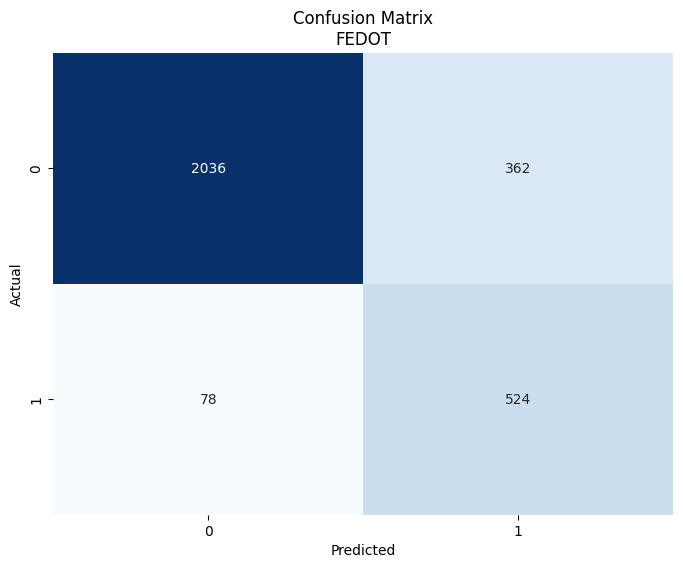

In [14]:
plt.figure(figsize=(8, 6))
cm = results[0]['Confusion Matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\nFEDOT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
X_train_df = pl.DataFrame(X_train, schema=feature_cols)
y_train_df = pl.DataFrame(y_train, schema=[target_col])
X_test_df = pl.DataFrame(X_test, schema=feature_cols)
y_test_df = pl.DataFrame(y_test, schema=[target_col])

train_data = pd.DataFrame(pl.concat([X_train_df, y_train_df], how='horizontal'))
test_data = pd.DataFrame(pl.concat([X_test_df, y_test_df], how='horizontal'))
train_data.columns = feature_cols + [target_col]
test_data.columns = feature_cols + [target_col]

In [50]:
automl = TabularAutoML(Task('binary'))
TabularAutoML_pred = automl.fit_predict(train_data, roles={'target': 'Healthy_Status'})

In [51]:
test_pred = automl.predict(test_data).data[:, 0]

test_pred_labels = (test_pred > 0.5).astype(int)
lama_f1_macro = f1_score(y_test, test_pred_labels, average='macro')
lama_f1_weighted = f1_score(y_test, test_pred_labels, average='weighted')
lama_cm = confusion_matrix(y_test, test_pred_labels)

results.append({
    'AutoML': 'LightAutoML',
    'F1 Macro': lama_f1_macro,
    'F1 Weighted': lama_f1_weighted,
    'Confusion Matrix': lama_cm
})

In [52]:
results

[{'AutoML': 'FEDOT',
  'F1 Macro': 0.8033916723861817,
  'F1 Weighted': 0.8627139098604439,
  'Confusion Matrix': array([[2036,  362],
         [  78,  524]])},
 {'AutoML': 'LightAutoML',
  'F1 Macro': 0.7882552230378317,
  'F1 Weighted': 0.8567080745341615,
  'Confusion Matrix': array([[2085,  313],
         [ 137,  465]])}]

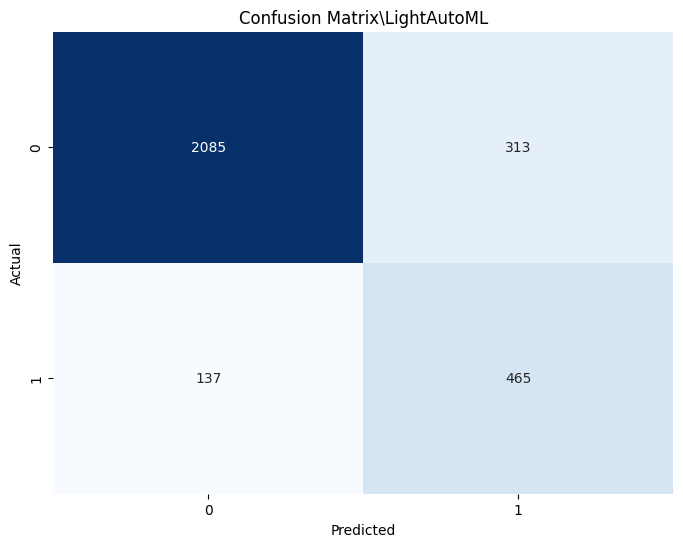

In [53]:
plt.figure(figsize=(8, 6))
cm = results[1]['Confusion Matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\LightAutoML')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /home/gadzhiev.vazhid/.cache/pypoetry/virtualenvs/platf-iIPEDB3B-py3.10/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpocxno1c2
  JVM stdout: /tmp/tmpocxno1c2/h2o_gadzhiev_vazhid_started_from_python.out
  JVM stderr: /tmp/tmpocxno1c2/h2o_gadzhiev_vazhid_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 28 days
H2O_cluster_name:,H2O_from_python_gadzhiev_vazhid_c447w6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [59]:
train_df = pd.DataFrame(X_train, columns=feature_cols)
train_df[target_col] = y_train

train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(X_test)

train_h2o[target_col] = train_h2o[target_col].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [61]:
H2OAML = H2OAutoML(
    max_runtime_secs=300,
    max_models=20,
    seed=42,
    sort_metric='AUTO',
    nfolds=5
)

H2OAML.train(x=feature_cols, y=target_col, training_frame=train_h2o)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20250525_171200_model_1


Model Summary: 
    number_of_trees
--  -----------------
    60

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0047893335084052985
RMSE: 0.06920501071747116
LogLoss: 0.03626134430210267
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.719737708568573
       0     1     Error    Rate
-----  ----  ----  -------  -------------
0      5453  0     0        (0.0/5453.0)
1      0     5453  0        (0.0/5453.0)
Total  5453  5453  0        (0.0/10906.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.719738     1         182
max f2                       0.719738     1         182
max f0point5                 0.719738     1         182
max accuracy                 0.719738     1         182
max precision                0.999125     1         0
max recall                   0.719738     1         182
max specificity              0.999125     1         0
max absolute_mcc             0.719738     1         182
max min_per_class_accuracy   0.719738     1         182
max mean_per_class_accuracy  0.719738     1         182
max tns                      0.999125     5453      0
max fns                      0.999125     5413      0
max fps                      2.52454e-05  5453      399
max tps                      0.719738     5453      182
max tnr                      0.999125     1         0
max fnr                      0.999125     0.992665  0
max fpr                      2.52454e-05  1         399
max tpr                      0.719738     1         182

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 49.99 %
group    cumulative_data_fraction    lower_threshold    lift    cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain    cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  ------  -----------------  --------------------
1        0.0101779                   0.997785           2       2                  1                0.998544     1                           0.998544            0.0203558       0.0203558                  100     100                0.0203558
2        0.0200807                   0.996791           2       2                  1                0.99726      1                           0.997911            0.0198056       0.0401614                  100     100                0.0401614
3        0.0300752                   0.99592            2       2                  1                0.996301     1                           0.997376            0.019989        0.0601504                  100     100                0.0601504
4        0.0400697                   0.995255           2       2                  1                0.995574     1                           0.996927            0.019989        0.0801394                  100     100                0.0801394
5        0.0501559                   0.994451           2       2                  1                0.994869     1                           0.996513            0.0201724       0.100312                   100     100                0.100312
6        0.100037                    0.990938           2       2                  1                0.992698     1                           0.994611            0.0997616       0.200073                   100     100                0.200073
7        0.150009                    0.987384           2       2                  1                0.989252     1                           0.992826         

In [72]:
test_df = pd.DataFrame(X_test, columns=feature_cols)
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


In [74]:
preds = H2OAML.leader.predict(test_h2o).as_data_frame()
y_pred = preds['predict']

h2o_f1_macro = f1_score(y_test, y_pred, average='macro')
h2o_f1_weighted = f1_score(y_test, y_pred, average='weighted')
h2o_cm = confusion_matrix(y_test, y_pred)

results.append({
    'AutoML': 'H2O',
    'F1 Macro': h2o_f1_macro,
    'F1 Weighted': h2o_f1_weighted,
    'Confusion Matrix': h2o_cm
})

xgboost prediction progress: |

███████████████████████████████████████████████████| (done) 100%


In [75]:
results

[{'AutoML': 'FEDOT',
  'F1 Macro': 0.8033916723861817,
  'F1 Weighted': 0.8627139098604439,
  'Confusion Matrix': array([[2036,  362],
         [  78,  524]])},
 {'AutoML': 'LightAutoML',
  'F1 Macro': 0.7882552230378317,
  'F1 Weighted': 0.8567080745341615,
  'Confusion Matrix': array([[2085,  313],
         [ 137,  465]])},
 {'AutoML': 'H2O',
  'F1 Macro': 0.7702406615453058,
  'F1 Weighted': 0.8504318785443324,
  'Confusion Matrix': array([[2147,  251],
         [ 204,  398]])}]

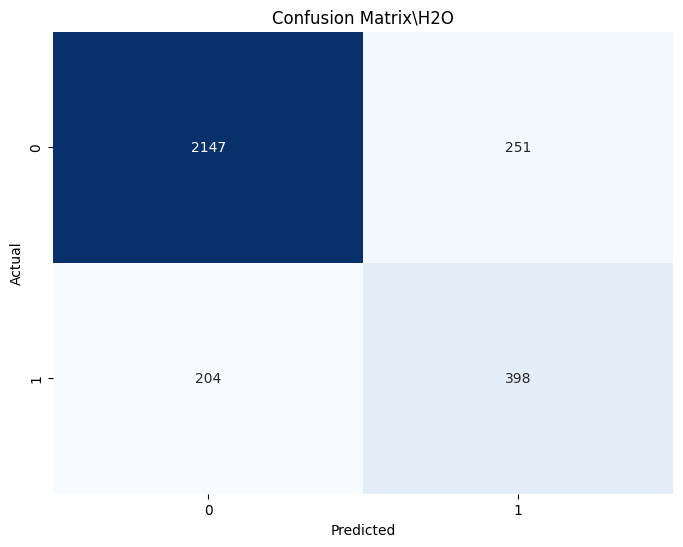

In [76]:
plt.figure(figsize=(8, 6))
cm = results[2]['Confusion Matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix\H2O')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
# Сохраняем дамп лучшей модели
joblib.dump(fedot_model, 'fedot_model.pkl')

['fedot_model.pkl']

In [80]:
# Сохраняем тестовые данные
test_data = pd.DataFrame(X_test)
test_data['target'] = y_test
test_data.to_csv('test_data.csv', index=False)

In [ ]:
import numpy as np
import joblib
import pandas as pd
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import uvicorn
from sklearn.metrics import f1_score, confusion_matrix

try:
    model_path = 'fedot_model.pkl'
    fedot_model = joblib.load(model_path)
    
    test_data = pd.read_csv('test_data.csv')
    X_test = test_data.drop('target', axis=1).values
    y_test = test_data['target'].values
except Exception as e:
    print(f"Error loading model or data: {e}")
    raise

app = FastAPI(title="ML Model API")

@app.get("/")
async def read_root():
    return {"message": "Welcome to the ML Model API"}

class DataInput(BaseModel):
    features: list 

@app.post("/predict/")
async def predict(data: DataInput):
    try:
        features = np.array(data.features).reshape(1, -1)
        prediction = fedot_model.predict(features=features)
        return {"prediction": prediction.tolist()}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.get("/metrics/")
async def get_metrics():
    try:
        fedot_preds = fedot_model.predict(features=X_test)
        fedot_f1_macro = f1_score(y_test, fedot_preds, average='macro')
        fedot_f1_weighted = f1_score(y_test, fedot_preds, average='weighted')
        fedot_cm = confusion_matrix(y_test, fedot_preds)

        return {
            "F1 Macro": float(fedot_f1_macro),
            "F1 Weighted": float(fedot_f1_weighted),
            "Confusion Matrix": fedot_cm.tolist()
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

if __name__ == "__main__":
    print("Starting server...")
    uvicorn.run(app, host="0.0.0.0", port=8000) 